In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.plot import plot, ProfileBuilder, plot_profile, plot_temp_trend
from utils.analyze import load_data
%matplotlib notebook

In [2]:
directory = "edge_kleber"
numbers = range(1,9)

In [3]:
x, y, z, T, t, settings = load_data(directory, numbers)
x = x[0]
y = y[0]
settings[0]

{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((8.0, 24.5, 0.1), (14.5, 31, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

<IPython.core.display.Javascript object>


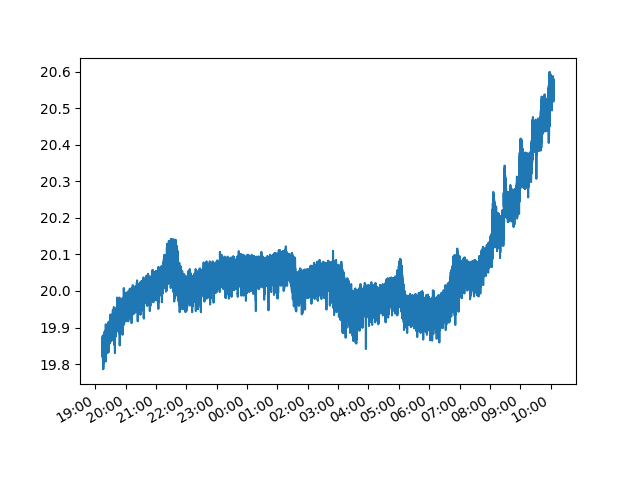

In [4]:
_ = plot_temp_trend(t, T)

<IPython.core.display.Javascript object>


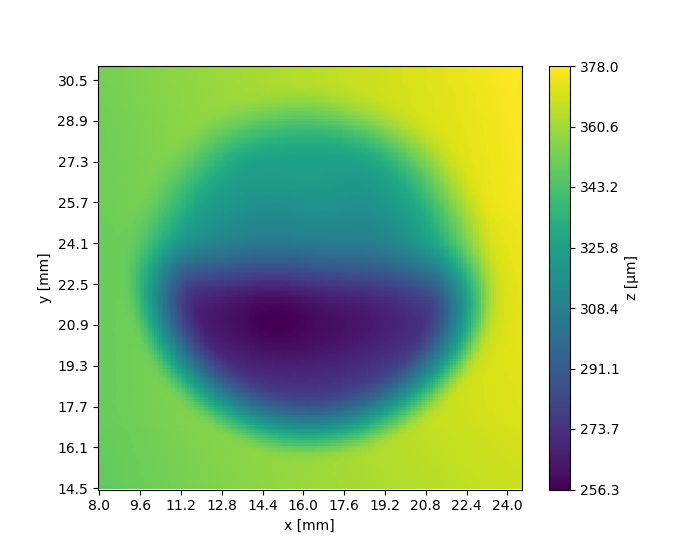

<IPython.core.display.Javascript object>


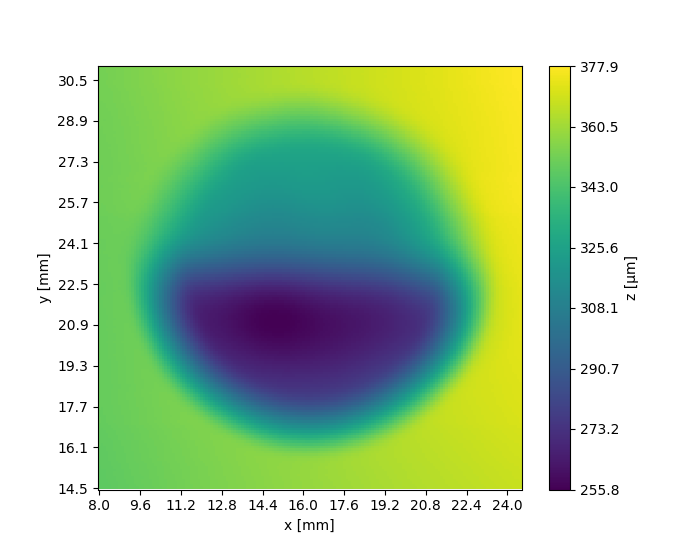

<IPython.core.display.Javascript object>


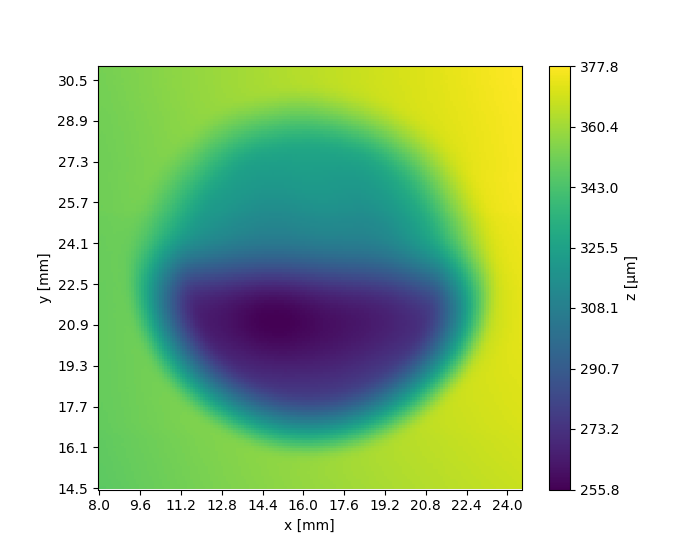

<IPython.core.display.Javascript object>


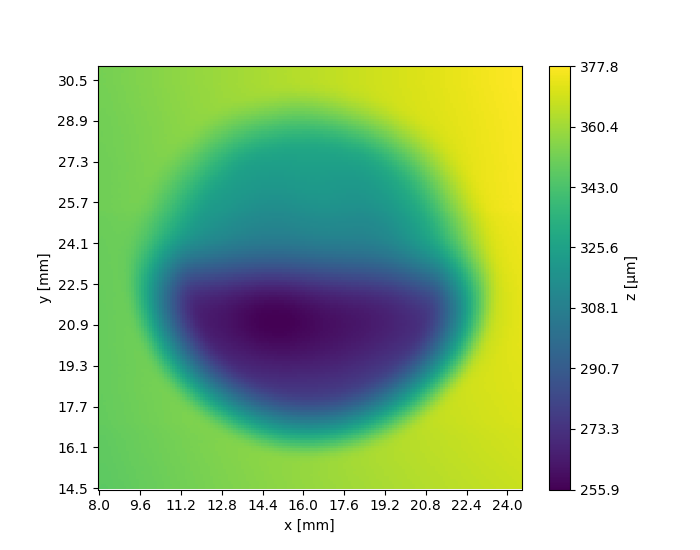

<IPython.core.display.Javascript object>


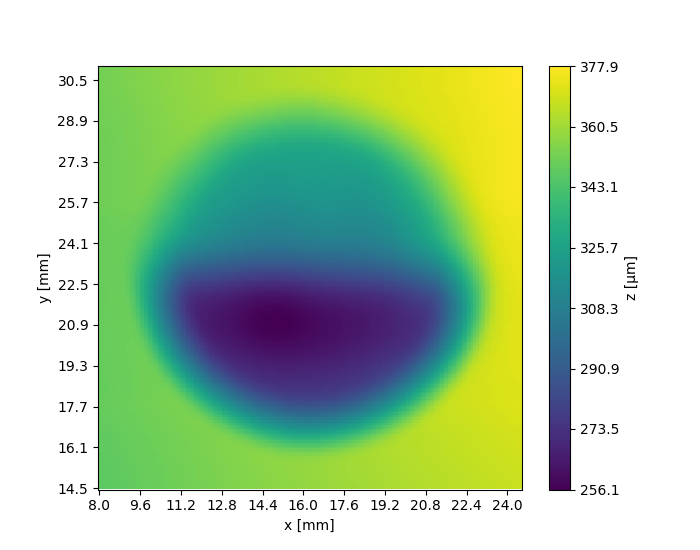

<IPython.core.display.Javascript object>


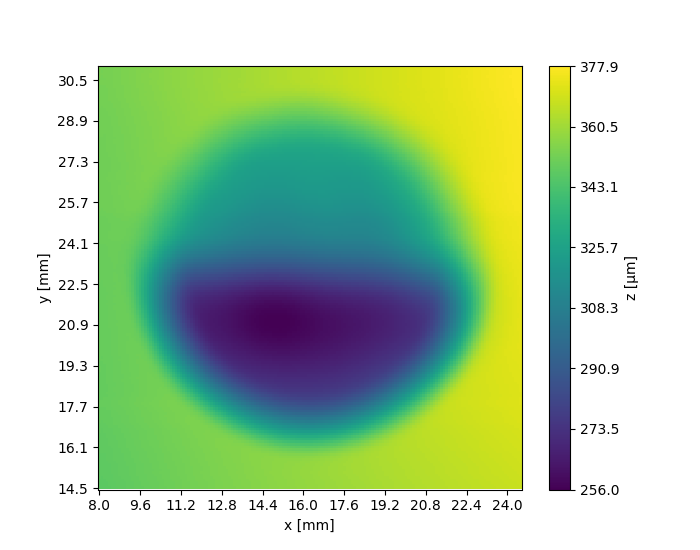

<IPython.core.display.Javascript object>


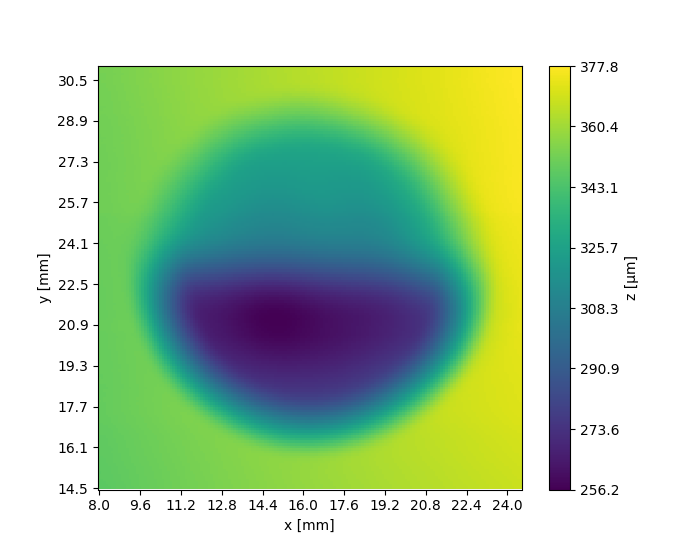

<IPython.core.display.Javascript object>


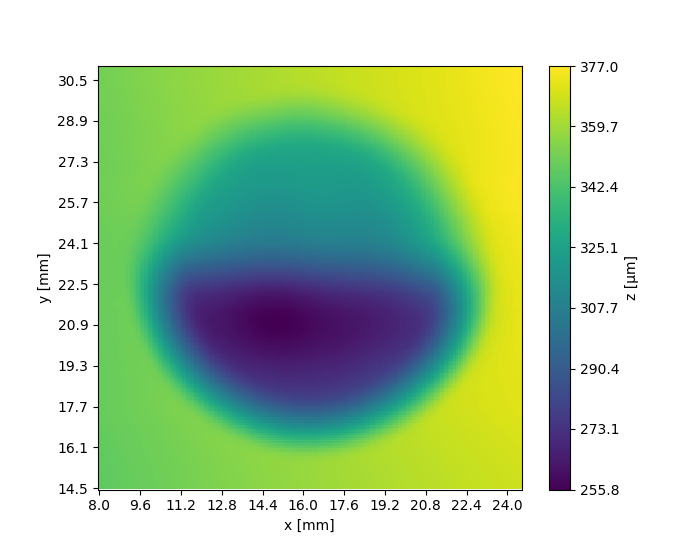

In [5]:
for zi in z:
    fig, ax = plot(x, y, zi[0])

<IPython.core.display.Javascript object>


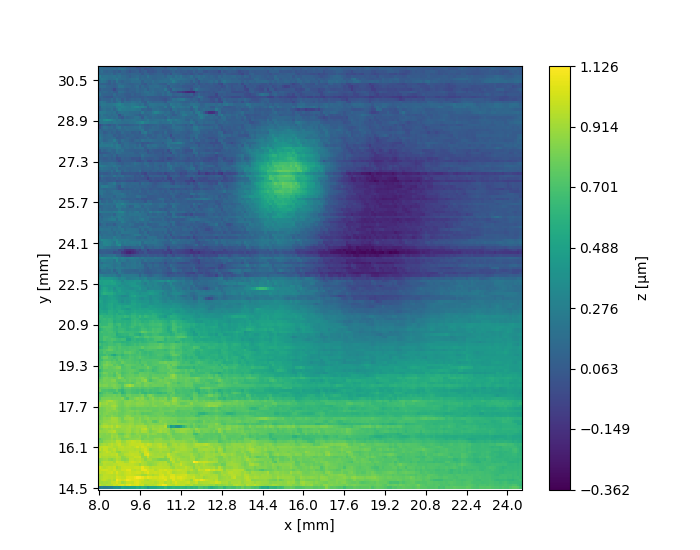

<IPython.core.display.Javascript object>


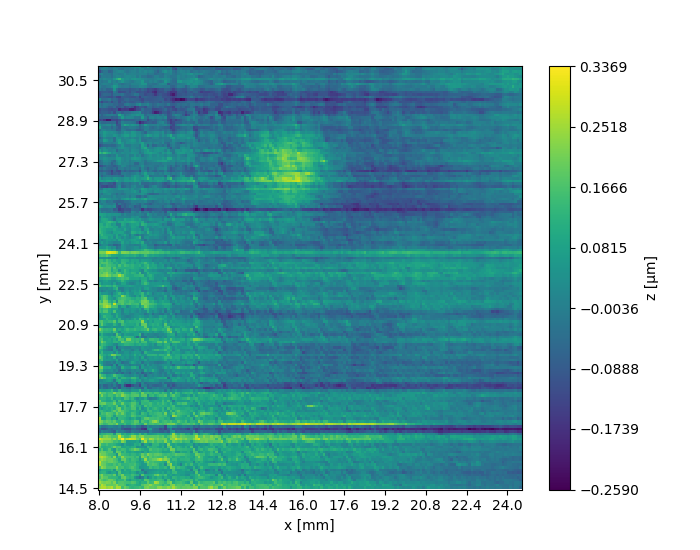

<IPython.core.display.Javascript object>


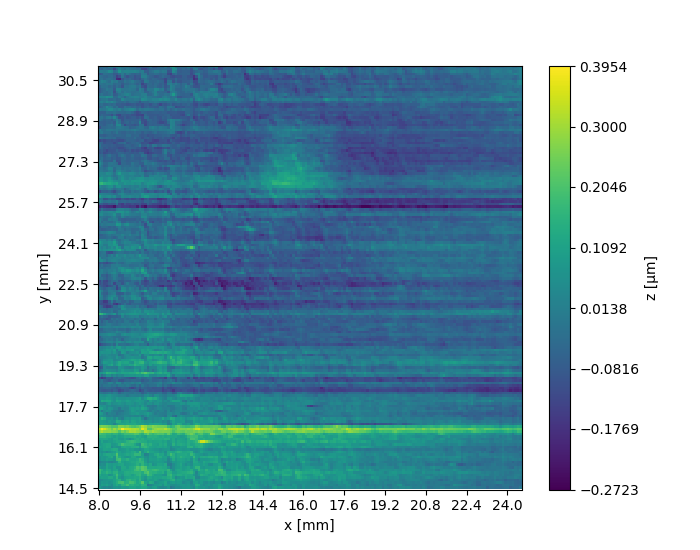

<IPython.core.display.Javascript object>


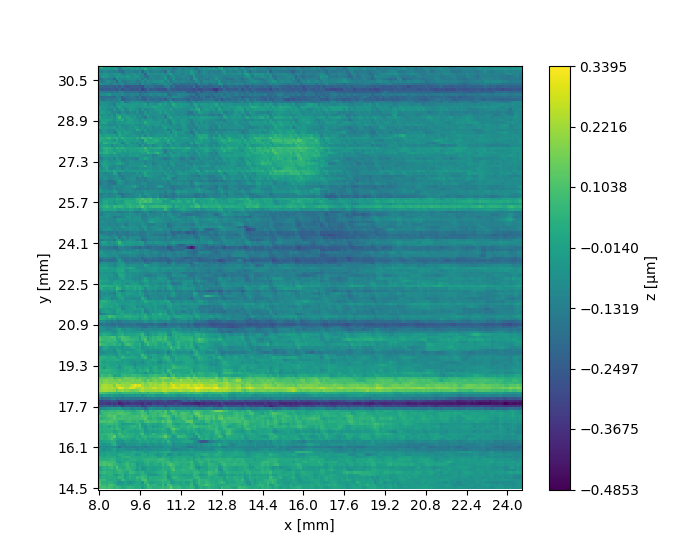

<IPython.core.display.Javascript object>


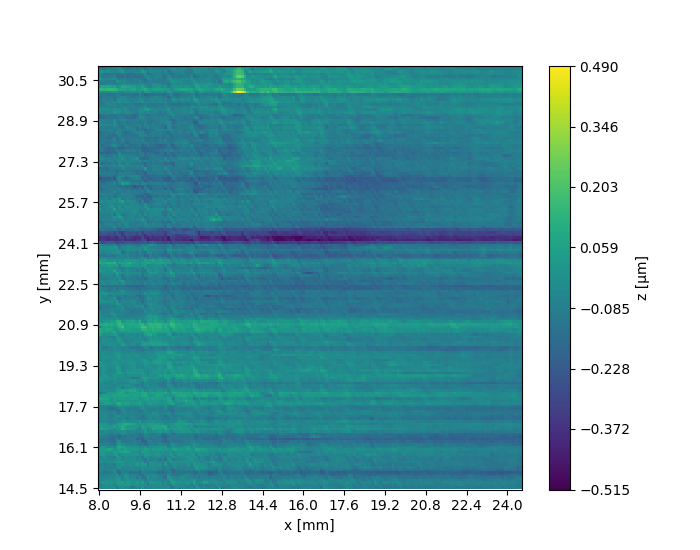

<IPython.core.display.Javascript object>


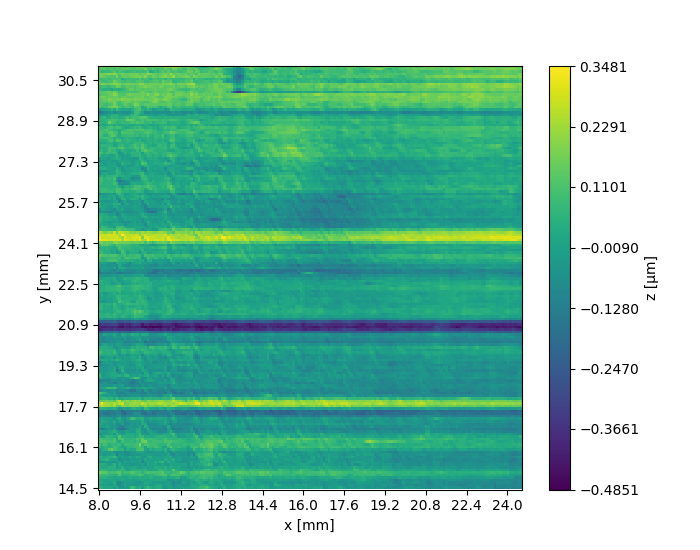

<IPython.core.display.Javascript object>


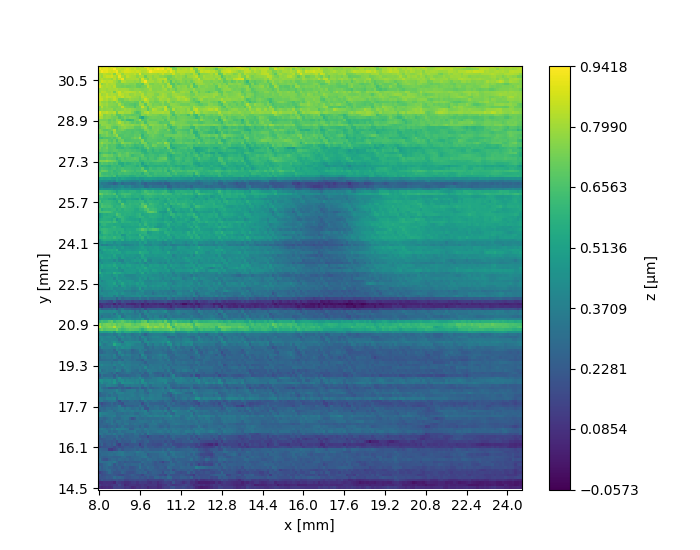

3.97774322225


In [6]:
s = 0
for zi, zj in zip(z, z[1:]):
    d = zi[0] - zj[0]
    s += d.max()
    fig, ax = plot(x, y, zi[0] - zj[0])
print(s)

<IPython.core.display.Javascript object>


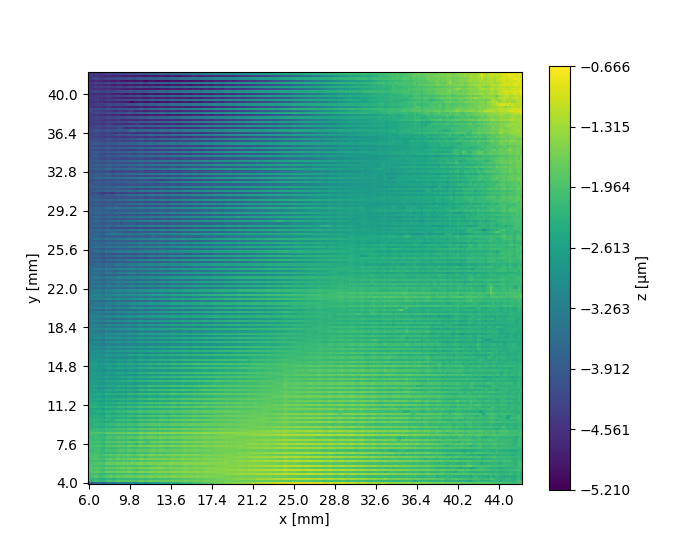

(<matplotlib.figure.Figure at 0x7fbbac04a4e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbbac64a978>)

In [17]:
plot(x, y, z[0][0] - z[-1][0])

In [18]:
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


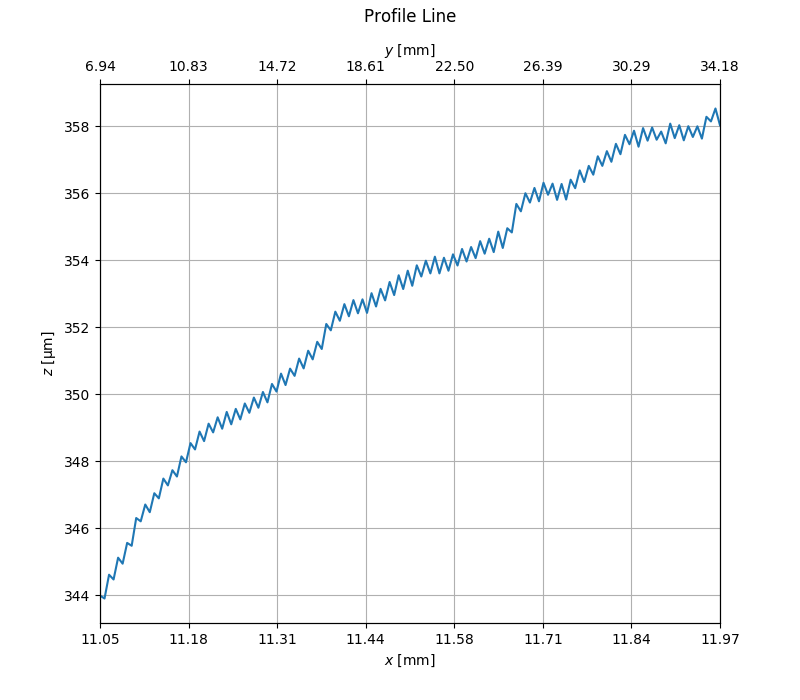

In [19]:
_ = plot_profile(x, y, z[0][0], *profile.coords)